# [MPL Classification](https://github.com/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec0.1-MLP_classification.ipynb)

In [32]:
import tensorflow
from sklearn.datasets import load_breast_cancer
import numpy

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

print(numpy.isnan(X).any())
print(X.shape, y.shape)

False
(569, 30) (569,)


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standard_scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
scaled_X_train = standard_scaler.fit_transform(X_train)
scaled_X_test = standard_scaler.transform(X_test)
# X_train_eval, X_eval, y_train_eval, y_eval = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# scaled_X_train_eval = standard_scaler.fit_transform(X_train_eval)
# scaled_X_eval = standard_scaler.transform(X_eval)
# scaled_X_test = standard_scaler.transform(X_test)
# scaled_X_train = standard_scaler.fit_transform(X_train)

# print(f"X_train{scaled_X_train_eval.shape}, X_val{scaled_X_eval.shape}, X_test{scaled_X_test.shape}")

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

def classification_model():
    model = Sequential(name='mlp_classification')
    model.add(InputLayer(X.shape[1], name='input_layer'))
    model.add(Dense(32, name='hidden_layer1', activation='relu')) # change to he initializer
    model.add(Dense(32, name='hidden_layer2', activation='relu')) # change to he initializer
    model.add(Dense(1, name='output_layer', activation='sigmoid')) # sigmoid probability of binary class
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [35]:
model = classification_model()
model.summary()

Model: "mlp_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 32)                992       
                                                                 
 hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [36]:
(10+1)*32+(33*32)+33*1 #TODO fix

1441

In [37]:
model.fit(scaled_X_train, y_train, epochs=500, validation_split=.2, verbose=0)

2022-04-20 11:36:26.535800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-20 11:36:26.743862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [39]:
import pandas as pd

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.762739,0.579087
1,0.521540,0.421682
2,0.381699,0.322292
3,0.291169,0.255460
4,0.226617,0.209404


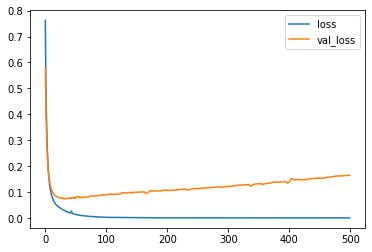

In [41]:
df_loss.plot(); # Clear overfitting

In [43]:
model = classification_model()
model.summary()

Model: "mlp_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 32)                992       
                                                                 
 hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(scaled_X_train, y_train, epochs=50, validation_split=.2, verbose=0)

2022-04-20 11:38:52.743121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-20 11:38:52.937496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


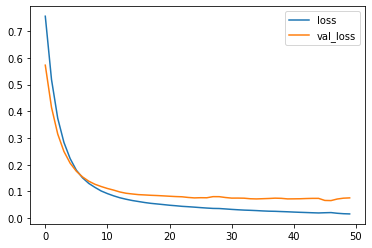

In [46]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot(); # Not overfitted anymore

In [47]:
model = classification_model()
model.fit(scaled_X_train, y_train, epochs=50, verbose=0)

2022-04-20 11:41:30.754387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.96      1.00      0.98        54

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



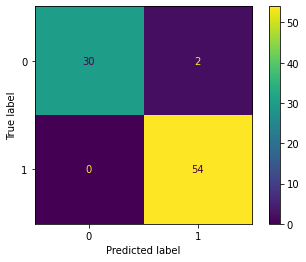

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
y_pred_classes = (y_pred > 0.5)*1

cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred_classes))